In [0]:
%pip install openai faiss-cpu langchain pypdf chromadb
dbutils.library.restartPython()

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/30.7 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 28.3/30.7 MB 232.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 30.7/30.7 MB 88.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.0 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/611.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.4 MB ? eta -:--

In [0]:
%restart_python

In [0]:
# List the files in your workspace folder
display(dbutils.fs.ls("dbfs:/Volumes/workspace/default/rag_demo_volume/"))


path name size modificationTime dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012.csv aws_bill_123456789012.csv 11513 1740522096000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Apr-2024.pdf aws_bill_123456789012_Apr-2024.pdf 2104 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Aug-2024.pdf aws_bill_123456789012_Aug-2024.pdf 2100 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Dec-2024.pdf aws_bill_123456789012_Dec-2024.pdf 2095 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Feb-2024.pdf aws_bill_123456789012_Feb-2024.pdf 2095 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jan-2024.pdf aws_bill_123456789012_Jan-2024.pdf 2102 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jul-2024.pdf aws_bill_123456789012_Jul-2024.pdf 2097 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jun-2024.pdf aws_bill_123456789012_Jun-2024.pdf 2093 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Mar-2024.pdf aws_bill_123456789012_Mar-2024.pdf 2097 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_May-2024.pdf aws_bill_123456789012_May-2024.pdf 2104 1740521742000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Nov-2024.pdf aws_bill_123456789012_Nov-2024.pdf 2098 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Oct-2024.pdf aws_bill_123456789012_Oct-2024.pdf 2098 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Sep-2024.pdf aws_bill_123456789012_Sep-2024.pdf 2093 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456.csv aws_bill_567890123456.csv 11517 1740522096000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Apr-2024.pdf aws_bill_567890123456_Apr-2024.pdf 2104 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Aug-2024.pdf aws_bill_567890123456_Aug-2024.pdf 2098 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Dec-2024.pdf aws_bill_567890123456_Dec-2024.pdf 2104 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Feb-2024.pdf aws_bill_567890123456_Feb-2024.pdf 2092 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jan-2024.pdf aws_bill_567890123456_Jan-2024.pdf 2099 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jul-2024.pdf aws_bill_567890123456_Jul-2024.pdf 2100 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jun-2024.pdf aws_bill_567890123456_Jun-2024.pdf 2097 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Mar-2024.pdf aws_bill_567890123456_Mar-2024.pdf 2098 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_May-2024.pdf aws_bill_567890123456_May-2024.pdf 2095 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Nov-2024.pdf aws_bill_567890123456_Nov-2024.pdf 2107 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Oct-2024.pdf aws_bill_567890123456_Oct-2024.pdf 2099 1740521743000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Sep-2024.pdf aws_bill_567890123456_Sep-2024.pdf 2090 1740521744000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098.csv aws_bill_987654321098.csv 11525 1740522096000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098_Apr-2024.pdf aws_bill_987654321098_Apr-2024.pdf 2099 1740521744000 dbfs:/Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098_Aug-2024.pdf aws_bill_987654321098_Aug-2024.pdf 2094 1740521744000 dbfs:/Volumes/workspace/default/rag_demo_volum

In [0]:
display(spark.sql("LIST '/Volumes/workspace/default/rag_demo_volume/'"))
 # Preview first 5 rows

path name size modification_time /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012.csv aws_bill_123456789012.csv 11513 1740522096000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Apr-2024.pdf aws_bill_123456789012_Apr-2024.pdf 2104 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Aug-2024.pdf aws_bill_123456789012_Aug-2024.pdf 2100 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Dec-2024.pdf aws_bill_123456789012_Dec-2024.pdf 2095 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Feb-2024.pdf aws_bill_123456789012_Feb-2024.pdf 2095 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jan-2024.pdf aws_bill_123456789012_Jan-2024.pdf 2102 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jul-2024.pdf aws_bill_123456789012_Jul-2024.pdf 2097 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Jun-2024.pdf aws_bill_123456789012_Jun-2024.pdf 2093 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Mar-2024.pdf aws_bill_123456789012_Mar-2024.pdf 2097 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_May-2024.pdf aws_bill_123456789012_May-2024.pdf 2104 1740521742000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Nov-2024.pdf aws_bill_123456789012_Nov-2024.pdf 2098 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Oct-2024.pdf aws_bill_123456789012_Oct-2024.pdf 2098 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Sep-2024.pdf aws_bill_123456789012_Sep-2024.pdf 2093 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456.csv aws_bill_567890123456.csv 11517 1740522096000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Apr-2024.pdf aws_bill_567890123456_Apr-2024.pdf 2104 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Aug-2024.pdf aws_bill_567890123456_Aug-2024.pdf 2098 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Dec-2024.pdf aws_bill_567890123456_Dec-2024.pdf 2104 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Feb-2024.pdf aws_bill_567890123456_Feb-2024.pdf 2092 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jan-2024.pdf aws_bill_567890123456_Jan-2024.pdf 2099 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jul-2024.pdf aws_bill_567890123456_Jul-2024.pdf 2100 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Jun-2024.pdf aws_bill_567890123456_Jun-2024.pdf 2097 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Mar-2024.pdf aws_bill_567890123456_Mar-2024.pdf 2098 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_May-2024.pdf aws_bill_567890123456_May-2024.pdf 2095 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Nov-2024.pdf aws_bill_567890123456_Nov-2024.pdf 2107 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Oct-2024.pdf aws_bill_567890123456_Oct-2024.pdf 2099 1740521743000 /Volumes/workspace/default/rag_demo_volume/aws_bill_567890123456_Sep-2024.pdf aws_bill_567890123456_Sep-2024.pdf 2090 1740521744000 /Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098.csv aws_bill_987654321098.csv 11525 1740522096000 /Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098_Apr-2024.pdf aws_bill_987654321098_Apr-2024.pdf 2099 1740521744000 /Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098_Aug-2024.pdf aws_bill_987654321098_Aug-2024.pdf 2094 1740521744000 /Volumes/workspace/default/rag_demo_volume/aws_bill_987654321098_Dec-2024.pdf aws_bill_987654321098_Dec-2024.pdf 2098 1740521744000 /Volumes/workspace/default/rag_demo_volume/aws_bill_987654

In [0]:
spark.sql("TRUNCATE TABLE aws_billing_data")


DataFrame[]

In [0]:
spark.sql("DROP TABLE IF EXISTS aws_billing_data")



DataFrame[]

In [0]:
%pip install pdfplumber

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.6 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.9 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 85.0 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
%pip install PyPDF2

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
from PyPDF2 import PdfReader

file_path = "/Volumes/workspace/default/rag_demo_volume/aws_bill_123456789012_Apr-2024.pdf"  # Change to actual file

reader = PdfReader(file_path)
for page in reader.pages:
    print(page.extract_text())  # If None or empty, it's an image-based PDF


In [0]:
%pip install pymupdf pdfplumber



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/20.0 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 137.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.6 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.9 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 102.7 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
# Load PDFs from the Unity Catalog volume
pdf_df = spark.read.format("binaryFile").load("/Volumes/workspace/default/rag_demo_volume/")

# Display file paths (use _metadata.file_path instead of input_file_name)
display(pdf_df.select("_metadata.file_path"))


file_path dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_data.csv dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_summary_5dc9a1b5.pdf dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_summary_c921d646.pdf dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_summary_3b7af5a1.pdf dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_summary_4c55ace3.pdf dbfs:/Volumes/workspace/default/rag_demo_volume/aws_cost_summary_410b879f.pdf

In [0]:
%pip install fitz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.3 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 2.1/3.3 MB 316.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.2 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 141.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.0 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 167.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.7 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/528.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.1 MB ? eta -:--:--
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/5.1 MB 324.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [0]:
dbutils.library.restartPython()

In [0]:
import pandas as pd
import glob

files = glob.glob("/Volumes/workspace/default/rag_demo_volume/*.csv")
df_list = [pd.read_csv(f) for f in files]
aws_billing_data = pd.concat(df_list, ignore_index=True)


In [0]:
%pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.2 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/792.7 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 42.3 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
from databricks.sdk import WorkspaceClient

w = WorkspaceClient()
w.secrets.create_scope(scope="my_secrets")


In [0]:
from databricks.sdk import WorkspaceClient

w = WorkspaceClient()

w.secrets.put_secret("my_secrets","OPENAI_API_KEY",string_value ="<secret>")

In [0]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.docstore.document import Document

# Retrieve OpenAI API key from Databricks Secrets
openai_api_key = dbutils.secrets.get(scope="my_secrets", key="OPENAI_API_KEY")

# Initialize OpenAI embeddings with API key
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

# Convert AWS billing data into text format for embedding
docs = [
    Document(
        page_content=f"Account ID: {row['Account ID']}, Month: {row['Month']}, Service: {row['Service']}, "
                     f"Instance Type: {row['Instance Type']}, Usage: {row['Usage']} {row['Unit']}, Cost: ${row['Cost']}"
    )
    for _, row in aws_billing_data.iterrows()
]

# Store embeddings in FAISS
vectorstore = FAISS.from_documents(docs, embeddings)
vectorstore.save_local("/Volumes/workspace/default/rag_demo_volume/faiss_index")

print("Vector store created successfully!")

# Query Example
query = "How much was spent on EC2 in January?"
retrieved_docs = vectorstore.similarity_search(query, k=5)
for doc in retrieved_docs:
    print(doc.page_content)



Vector store created successfully!
Account ID: 100000000026, Month: 2025-01, Service: EC2, Instance Type: t3.medium, Usage: 338909 per hour, Cost: $520549.6
Account ID: 100000000031, Month: 2025-02, Service: EC2, Instance Type: t3.medium, Usage: 960443 per request, Cost: $1069005.0
Account ID: 100000000020, Month: 2025-01, Service: EC2, Instance Type: t3.medium, Usage: 180748 per query, Cost: $115859.81
Account ID: 100000000008, Month: 2025-01, Service: EC2, Instance Type: t3.medium, Usage: 192056 per GB, Cost: $178436.56
Account ID: 100000000031, Month: 2025-01, Service: EC2, Instance Type: m5.large, Usage: 5612 per query, Cost: $10521.73


In [0]:
%pip install databricks-vectorsearch


  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Not uninstalling protobuf at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5ba132e4-7277-450a-9ed0-59e742dc25d9
    Can't uninstall 'protobuf'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.30.0 requires protobuf<6.0,>=5.0, but you have protobuf 4.25.6 which is incompatible.
grpcio-status 1.69.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
import databricks.vector_search
print("Databricks Vector Search module is available!")


Databricks Vector Search module is available!


In [0]:
import databricks.vector_search
print(dir(databricks.vector_search))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'client', 'exceptions', 'index', 'utils', 'version']


In [0]:
from databricks.vector_search.client import VectorSearchClient  

# Initialize client (if available)
client = VectorSearchClient()

# Check available methods in the client
print(dir(client))


[NOTICE] Using a notebook authentication token. Recommended for development only. For improved performance, please use Service Principal based authentication. To disable this message, pass disable_notice=True to VectorSearchClient().
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_control_plane_oauth_token', '_control_plane_oauth_token_expiry_ts', '_get_index_url', '_get_mlserving_endpoint_name_from_resp', '_get_token_for_request', '_is_notebook_pat', '_using_user_passed_credentials', 'azure_login_id', 'azure_tenant_id', 'create_delta_sync_index', 'create_delta_sync_index_and_wait', 'create_direct_access_index', 'create_endpoint', 'create_endpoint_and_wait', 'delete_endpoint',

In [0]:
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

# 🔑 Securely retrieve OpenAI API key from Databricks Secrets
openai_api_key = dbutils.secrets.get(scope="my_secrets", key="OPENAI_API_KEY")

# 🔍 Load the FAISS Vector Store
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)
vectorstore = FAISS.load_local("/Volumes/workspace/default/rag_demo_volume/faiss_index", embeddings,
    allow_dangerous_deserialization=True)

# using gpt-4
llm = ChatOpenAI(model="gpt-4", openai_api_key=openai_api_key)

# 🎯 Define a custom prompt template
prompt_template = """You are a cloud cost optimization assistant. 
You have access to AWS billing data and should provide cost-saving recommendations.
Use the retrieved information to generate insights.

User Question: {query}
AWS Billing Data: {context}

Provide an optimized answer with actionable recommendations.
"""
prompt = PromptTemplate(template=prompt_template, input_variables=["query", "context"])

# 🔗 Create Retrieval-Based QA Chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectorstore.as_retriever(search_kwargs={"k": 5}),  # Top 5 most relevant docs
    chain_type_kwargs={"prompt": prompt}
)


In [0]:
print("Expected input keys:", qa_chain.input_keys)


Expected input keys: ['query']


In [0]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS

# Retrieve OpenAI API key from Databricks Secrets
openai_api_key = dbutils.secrets.get(scope="my_secrets", key="OPENAI_API_KEY")

# Load FAISS vector store
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)
vectorstore = FAISS.load_local("/Volumes/workspace/default/rag_demo_volume/faiss_index", embeddings, allow_dangerous_deserialization=True)

print("✅ FAISS Vector Store Loaded Successfully!")


✅ FAISS Vector Store Loaded Successfully!


In [0]:
print("Expected input keys:", qa_chain.input_keys)

Expected input keys: ['query']


In [0]:
retrieved_docs = qa_chain.retriever.get_relevant_documents(query)
for doc in retrieved_docs:
    print(doc.page_content)

/home/spark-5ba132e4-7277-450a-9ed0-59/.ipykernel/60513/command-5089528324846649-2403591142:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = qa_chain.retriever.get_relevant_documents(query)


Account ID: 100000000032, Month: 2025-01, Service: EC2, Instance Type: c5.xlarge, Usage: 427466 per hour, Cost: $80324.43
Account ID: 100000000038, Month: 2025-01, Service: EC2, Instance Type: c5.xlarge, Usage: 307001 per GB, Cost: $453342.82
Account ID: 100000000027, Month: 2025-01, Service: EC2, Instance Type: c5.xlarge, Usage: 427690 per hour, Cost: $453968.29
Account ID: 100000000008, Month: 2025-01, Service: EC2, Instance Type: t3.medium, Usage: 192056 per GB, Cost: $178436.56
Account ID: 100000000036, Month: 2025-01, Service: EC2, Instance Type: m5.large, Usage: 122211 per GB, Cost: $35220.25


In [0]:
print(type(qa_chain))

<class 'langchain.chains.retrieval_qa.base.RetrievalQA'>


In [0]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})


In [0]:
from langchain_openai import ChatOpenAI  # ✅ Correct import
from langchain.chains import RetrievalQA

# Initialize OpenAI LLM with the correct module
llm = ChatOpenAI(api_key=openai_api_key)  # ✅ Use 'api_key' instead of 'openai_api_key'

# Convert FAISS into a retriever
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})

# Create RAG QA Chain
qa_chain = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

# Query Example
query = "How can I optimize AWS EC2 costs for January?"
response = qa_chain.invoke({"query": query})  # ✅ Ensure dictionary format

print("🔹 AWS Cost Optimization Insights:\n")
print(response)



🔹 AWS Cost Optimization Insights:

{'query': 'How can I optimize AWS EC2 costs for January?', 'result': 'To optimize AWS EC2 costs for January, you can consider the following strategies:\n\n1. **Rightsize instances**: Analyze your current instance types and usage patterns to ensure that you are using the most cost-effective instance type for your workload. Consider resizing or switching to reserved instances if your workload is consistent.\n\n2. **Use Spot Instances**: Utilize Spot Instances for non-critical workloads that can tolerate interruptions. Spot Instances can offer significant cost savings compared to On-Demand instances.\n\n3. **Implement Auto Scaling**: Set up auto-scaling to dynamically adjust the number of instances based on workload demands. This ensures that you are not over-provisioning, leading to unnecessary costs.\n\n4. **Use Savings Plans or Reserved Instances**: Consider purchasing Reserved Instances or Savings Plans for predictable workloads to secure discounted 

In [0]:
%pip install -U langchain-cohere cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.3 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Not uninstalling urllib3 at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5ba132e4-7277-450a-9ed0-59e742dc25d9
    Can't uninstall 'urllib3'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.34.39 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 2.3.0 which is incompatible.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
from databricks.sdk import WorkspaceClient

w = WorkspaceClient()

w.secrets.put_secret("my_secrets","COHERE_API_KEY",string_value ="O8BNLKgmPQPblWDEuA7vzGgZa9V9KNHrbRaYLTvf")

In [0]:
from langchain.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_cohere import CohereRerank
from langchain.retrievers import BM25Retriever
from langchain.storage import InMemoryStore
from langchain.schema import Document

import os



# Load OpenAI API Key
openai_api_key = dbutils.secrets.get(scope="my_secrets", key="OPENAI_API_KEY")

# Load FAISS Vector Store
embedding_model = OpenAIEmbeddings(openai_api_key=openai_api_key)
vectorstore = FAISS.load_local("/Volumes/workspace/default/rag_demo_volume/faiss_index", 
                               embedding_model, 
                               allow_dangerous_deserialization=True)

print("✅ FAISS Vector Store Loaded Successfully!")

# ✅ Extract stored documents from FAISS
retrieved_docs = vectorstore.similarity_search("Retrieve all documents", k=100)

# 🔍 **Ensure retrieved_docs are valid Document objects**
if not retrieved_docs or not all(isinstance(doc, Document) for doc in retrieved_docs):
    raise ValueError("🚨 Error: Retrieved documents are not valid `Document` objects!")

print(f"📄 Loaded {len(retrieved_docs)} documents for BM25 Retriever")

# ✅ Initialize BM25 Retriever with InMemoryStore


bm25_store = InMemoryStore()
bm25_retriever = BM25Retriever(store=bm25_store, docs=retrieved_docs)  # P

print("🔍 BM25 Retriever Initialized!")

# ✅ Load LLM
llm = ChatOpenAI(api_key=openai_api_key)

# ✅ Initialize Reranker (Fix API Key issue)
cohere_api_key = dbutils.secrets.get(scope="my_secrets", key="COHERE_API_KEY")
# ✅ Set API Key in environment
os.environ["CO_API_KEY"] = cohere_api_key
reranker = CohereRerank(model="rerank-english-v2.0")  # No API key argument needed

print("🎯 RAG Pipeline Initialized Successfully!")


✅ FAISS Vector Store Loaded Successfully!
📄 Loaded 100 documents for BM25 Retriever
🔍 BM25 Retriever Initialized!
🎯 RAG Pipeline Initialized Successfully!


In [0]:
# Read all CSV files in the directory
df = spark.read.csv("/Volumes/workspace/default/rag_demo_volume/*.csv", header=True, inferSchema=True)

# Create a temporary SQL view for querying
df.createOrReplaceTempView("aws_billing")

# Display the first few rows
display(df)


Account ID Month Service Instance Type Usage Unit Cost 100000000000 2025-01-01 EC2 t3.micro 179240 per hour 236217.65 100000000000 2025-01-01 S3 r5.2xlarge 934688 per request 408750.26 100000000000 2025-01-01 Lambda c5.xlarge 589935 per request 254180.52 100000000000 2025-01-01 RDS r5.2xlarge 176423 per query 244451.69 100000000000 2025-01-01 EKS t3.medium 392440 per message 340765.61 100000000000 2025-01-01 CloudFront t3.medium 137563 per message 152347.94 100000000000 2025-01-01 DynamoDB m5.large 144385 per query 256682.9 100000000000 2025-01-01 EBS t3.medium 905247 per GB 250835.27 100000000000 2025-01-01 VPC m5.large 627625 per query 1010619.64 100000000000 2025-01-01 CloudWatch t3.micro 863120 per GB 795533.63 100000000000 2025-01-01 Route 53 c5.xlarge 403501 per GB 220405.55 100000000000 2025-01-01 SNS c5.xlarge 351020 per message 356985.22 100000000000 2025-01-01 SQS m5.large 520210 per query 392683.17 100000000000 2025-01-01 Glue c5.xlarge 95691 per GB 115275.17 100000000000 2025-01-01 Redshift t3.micro 48669 per request 68005.77 100000000001 2025-01-01 EC2 r5.2xlarge 100940 per query 27248.92 100000000001 2025-01-01 S3 t3.medium 609825 per query 1168755.2 100000000001 2025-01-01 Lambda r5.2xlarge 777720 per request 209614.75 100000000001 2025-01-01 RDS c5.xlarge 493392 per hour 147264.03 100000000001 2025-01-01 EKS m5.large 322333 per message 123077.77 100000000001 2025-01-01 CloudFront t3.micro 501029 per query 689711.33 100000000001 2025-01-01 DynamoDB t3.micro 68946 per message 44203.38 100000000001 2025-01-01 EBS t3.medium 261995 per GB 200567.39 100000000001 2025-01-01 VPC m5.large 462020 per query 516048.97 100000000001 2025-01-01 CloudWatch t3.micro 416576 per request 422138.12 100000000001 2025-01-01 Route 53 t3.medium 665157 per query 1307099.61 100000000001 2025-01-01 SNS c5.xlarge 746462 per GB 1366790.14 100000000001 2025-01-01 SQS m5.large 459335 per query 691775.33 100000000001 2025-01-01 Glue m5.large 601617 per request 1123226.48 100000000001 2025-01-01 Redshift r5.2xlarge 723454 per query 120503.51 100000000002 2025-01-01 EC2 m5.large 742172 per request 1099110.01 100000000002 2025-01-01 S3 c5.xlarge 48963 per message 50934.55 100000000002 2025-01-01 Lambda r5.2xlarge 452700 per query 129180.84 100000000002 2025-01-01 RDS c5.xlarge 370853 per hour 591376.71 100000000002 2025-01-01 EKS c5.xlarge 454214 per request 146073.7 100000000002 2025-01-01 CloudFront t3.micro 497858 per GB 552939.35 100000000002 2025-01-01 DynamoDB r5.2xlarge 127881 per hour 139746.68 100000000002 2025-01-01 EBS m5.large 350103 per hour 658218.79 100000000002 2025-01-01 VPC c5.xlarge 608553 per request 986241.49 100000000002 2025-01-01 CloudWatch m5.large 174524 per GB 91540.19 100000000002 2025-01-01 Route 53 c5.xlarge 681905 per request 1035187.5 100000000002 2025-01-01 SNS c5.xlarge 57212 per message 65535.23 100000000002 2025-01-01 SQS t3.medium 735778 per GB 1046359.06 100000000002 2025-01-01 Glue t3.micro 198750 per query 34657.65 100000000002 2025-01-01 Redshift t3.micro 323367 per GB 594912.84 100000000003 2025-01-01 EC2 t3.medium 605037 per hour 830084.89 100000000003 2025-01-01 S3 m5.large 356783 per GB 520942.09 100000000003 2025-01-01 Lambda t3.micro 440197 per hour 550467.85 100000000003 2025-01-01 RDS t3.medium 884119 per message 1268300.41 100000000003 2025-01-01 EKS c5.xlarge 214199 per hour 54834.85 100000000003 2025-01-01 CloudFront t3.medium 118979 per hour 188949.01 100000000003 2025-01-01 DynamoDB t3.micro 391878 per GB 745923.45 100000000003 2025-01-01 EBS t3.micro 636336 per request 289182.38 100000000003 2025-01-01 VPC t3.micro 619891 per message 420556.52 100000000003 2025-01-01 CloudWatch t3.medium 862833 per message 580796.04 100000000003 2025-01-01 Route 53 t3.medium 293655 per query 92382.76 100000000003 2025-01-01 SNS t3.medium 252863 per message 304515.41 100000000003 2025-01-01 SQS t3.micro 65132 per hour 88248.75 100000000003 2025-01-01 Glue t3.medium 712223 per hour 733028.37 100000000003 2025-0

In [0]:
# Aggregate cost per service
service_cost_df = spark.sql("""
    SELECT Service, SUM(Cost) as Total_Cost
    FROM aws_billing
    GROUP BY Service
    ORDER BY Total_Cost DESC
""").toPandas()

# Aggregate cost per month
monthly_cost_df = spark.sql("""
    SELECT Month, SUM(Cost) as Total_Cost
    FROM aws_billing
    GROUP BY Month
    ORDER BY Month
""").toPandas()


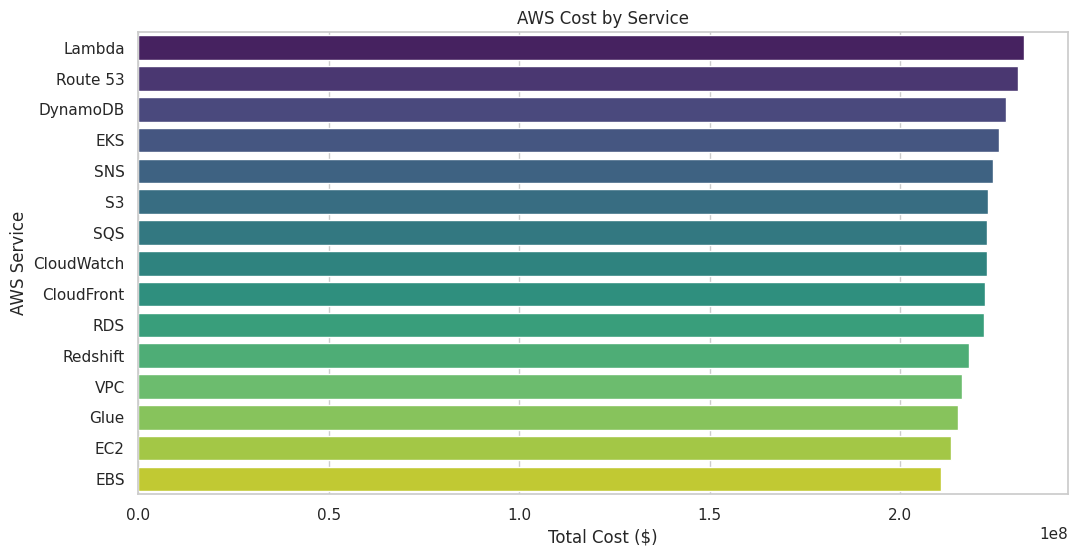

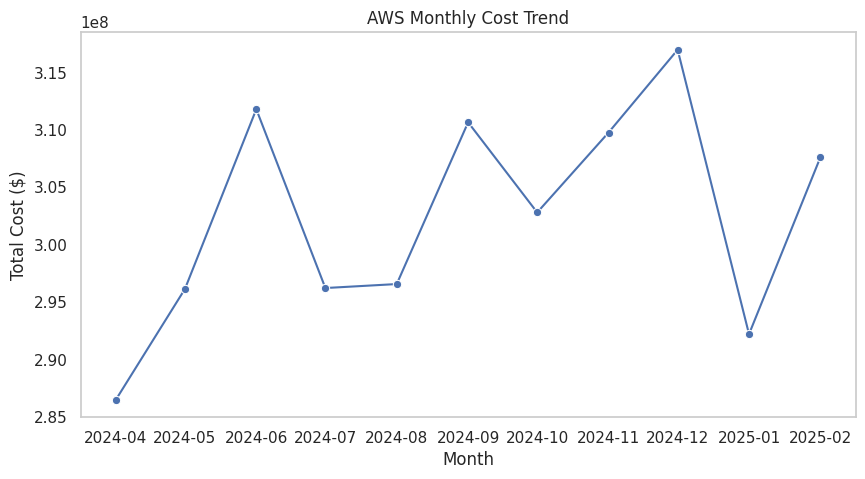

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="whitegrid")

# 📊 **Plot 1: Cost by Service**
plt.figure(figsize=(12, 6))
sns.barplot(x="Total_Cost", y="Service", data=service_cost_df, palette="viridis")
plt.xlabel("Total Cost ($)")
plt.ylabel("AWS Service")
plt.title("AWS Cost by Service")
plt.show()

# 📈 **Plot 2: Monthly Cost Trend**
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Total_Cost", data=monthly_cost_df, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Cost ($)")
plt.title("AWS Monthly Cost Trend")
plt.grid()
plt.show()


In [0]:
# Read all CSV files from the directory
df = spark.read.csv("/Volumes/workspace/default/rag_demo_volume/*.csv", header=True, inferSchema=True)

# Ensure necessary columns exist
required_columns = ["Account ID", "Service", "Month", "Cost"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"Missing columns in CSV files: {missing_columns}")

# Convert Month to proper Date format
from pyspark.sql.functions import to_date, col
df = df.withColumn("Month", to_date(col("Month"), "yyyy-MM"))

# Create a SQL view for querying
df.createOrReplaceTempView("aws_billing")

# Display the first few rows
display(df)



Account ID Month Service Instance Type Usage Unit Cost 100000000000 2025-01-01 EC2 t3.micro 179240 per hour 236217.65 100000000000 2025-01-01 S3 r5.2xlarge 934688 per request 408750.26 100000000000 2025-01-01 Lambda c5.xlarge 589935 per request 254180.52 100000000000 2025-01-01 RDS r5.2xlarge 176423 per query 244451.69 100000000000 2025-01-01 EKS t3.medium 392440 per message 340765.61 100000000000 2025-01-01 CloudFront t3.medium 137563 per message 152347.94 100000000000 2025-01-01 DynamoDB m5.large 144385 per query 256682.9 100000000000 2025-01-01 EBS t3.medium 905247 per GB 250835.27 100000000000 2025-01-01 VPC m5.large 627625 per query 1010619.64 100000000000 2025-01-01 CloudWatch t3.micro 863120 per GB 795533.63 100000000000 2025-01-01 Route 53 c5.xlarge 403501 per GB 220405.55 100000000000 2025-01-01 SNS c5.xlarge 351020 per message 356985.22 100000000000 2025-01-01 SQS m5.large 520210 per query 392683.17 100000000000 2025-01-01 Glue c5.xlarge 95691 per GB 115275.17 100000000000 2025-01-01 Redshift t3.micro 48669 per request 68005.77 100000000001 2025-01-01 EC2 r5.2xlarge 100940 per query 27248.92 100000000001 2025-01-01 S3 t3.medium 609825 per query 1168755.2 100000000001 2025-01-01 Lambda r5.2xlarge 777720 per request 209614.75 100000000001 2025-01-01 RDS c5.xlarge 493392 per hour 147264.03 100000000001 2025-01-01 EKS m5.large 322333 per message 123077.77 100000000001 2025-01-01 CloudFront t3.micro 501029 per query 689711.33 100000000001 2025-01-01 DynamoDB t3.micro 68946 per message 44203.38 100000000001 2025-01-01 EBS t3.medium 261995 per GB 200567.39 100000000001 2025-01-01 VPC m5.large 462020 per query 516048.97 100000000001 2025-01-01 CloudWatch t3.micro 416576 per request 422138.12 100000000001 2025-01-01 Route 53 t3.medium 665157 per query 1307099.61 100000000001 2025-01-01 SNS c5.xlarge 746462 per GB 1366790.14 100000000001 2025-01-01 SQS m5.large 459335 per query 691775.33 100000000001 2025-01-01 Glue m5.large 601617 per request 1123226.48 100000000001 2025-01-01 Redshift r5.2xlarge 723454 per query 120503.51 100000000002 2025-01-01 EC2 m5.large 742172 per request 1099110.01 100000000002 2025-01-01 S3 c5.xlarge 48963 per message 50934.55 100000000002 2025-01-01 Lambda r5.2xlarge 452700 per query 129180.84 100000000002 2025-01-01 RDS c5.xlarge 370853 per hour 591376.71 100000000002 2025-01-01 EKS c5.xlarge 454214 per request 146073.7 100000000002 2025-01-01 CloudFront t3.micro 497858 per GB 552939.35 100000000002 2025-01-01 DynamoDB r5.2xlarge 127881 per hour 139746.68 100000000002 2025-01-01 EBS m5.large 350103 per hour 658218.79 100000000002 2025-01-01 VPC c5.xlarge 608553 per request 986241.49 100000000002 2025-01-01 CloudWatch m5.large 174524 per GB 91540.19 100000000002 2025-01-01 Route 53 c5.xlarge 681905 per request 1035187.5 100000000002 2025-01-01 SNS c5.xlarge 57212 per message 65535.23 100000000002 2025-01-01 SQS t3.medium 735778 per GB 1046359.06 100000000002 2025-01-01 Glue t3.micro 198750 per query 34657.65 100000000002 2025-01-01 Redshift t3.micro 323367 per GB 594912.84 100000000003 2025-01-01 EC2 t3.medium 605037 per hour 830084.89 100000000003 2025-01-01 S3 m5.large 356783 per GB 520942.09 100000000003 2025-01-01 Lambda t3.micro 440197 per hour 550467.85 100000000003 2025-01-01 RDS t3.medium 884119 per message 1268300.41 100000000003 2025-01-01 EKS c5.xlarge 214199 per hour 54834.85 100000000003 2025-01-01 CloudFront t3.medium 118979 per hour 188949.01 100000000003 2025-01-01 DynamoDB t3.micro 391878 per GB 745923.45 100000000003 2025-01-01 EBS t3.micro 636336 per request 289182.38 100000000003 2025-01-01 VPC t3.micro 619891 per message 420556.52 100000000003 2025-01-01 CloudWatch t3.medium 862833 per message 580796.04 100000000003 2025-01-01 Route 53 t3.medium 293655 per query 92382.76 100000000003 2025-01-01 SNS t3.medium 252863 per message 304515.41 100000000003 2025-01-01 SQS t3.micro 65132 per hour 88248.75 100000000003 2025-01-01 Glue t3.medium 712223 per hour 733028.37 100000000003 2025-0

In [0]:
monthly_trend_df = spark.sql("""
    SELECT Month, `Account ID`, SUM(Cost) as Total_Cost
    FROM aws_billing
    GROUP BY Month, `Account ID`
    ORDER BY Month, Total_Cost DESC
""").toPandas()



In [0]:
%pip install plotly dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 152.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Not uninstalling click at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5ba132e4-7277-450a-9ed0-59e742dc25d9
    Can't uninstall 'click'. No files were found to uninstall.
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
    Not uninstalling blinker at /usr/lib/python3/dist-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5ba132e4-7277-450a-9ed0-59e742dc25d9
    Can't uninstall 'blinker'. No files were found to uninstall.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

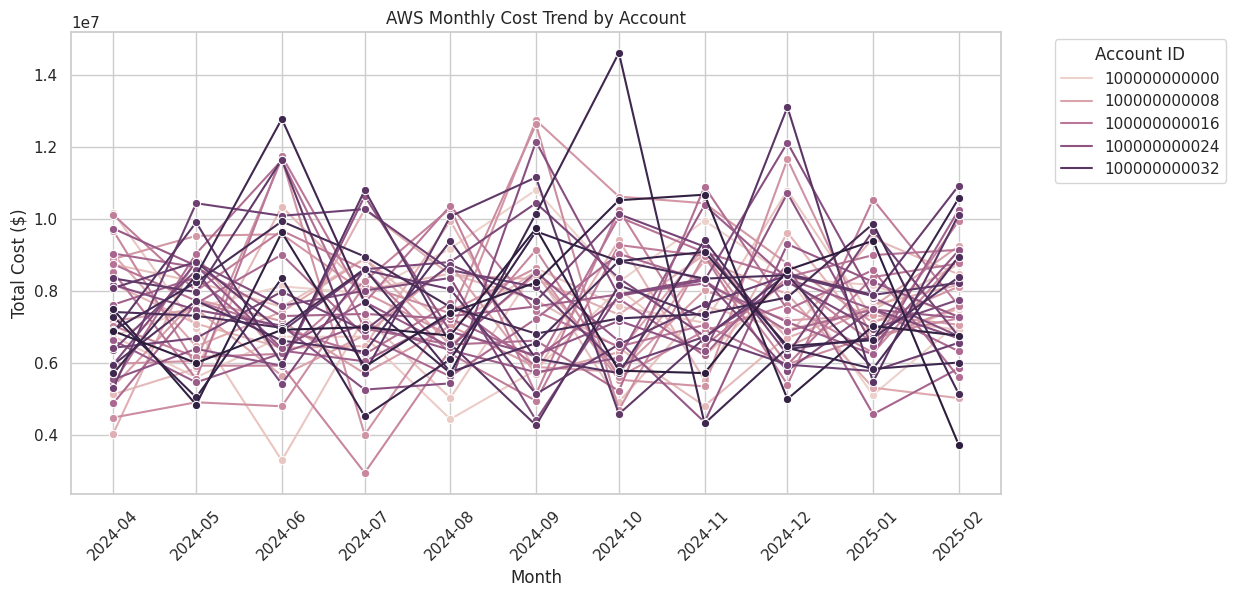

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend_df, x="Month", y="Total_Cost", hue="Account ID", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Cost ($)")
plt.title("AWS Monthly Cost Trend by Account")
plt.xticks(rotation=45)
plt.legend(title="Account ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [0]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from pyspark.sql.functions import to_date, col

# Read all CSV files
df = spark.read.csv("/Volumes/workspace/default/rag_demo_volume/*.csv", header=True, inferSchema=True)

# Convert Month to proper Date format
df = df.withColumn("Month", to_date(col("Month"), "yyyy-MM"))

# Convert to Pandas for visualization
df_pandas = df.toPandas()

# Extract unique values for filters
account_options = [{"label": acc, "value": acc} for acc in df_pandas["Account ID"].unique()]
service_options = [{"label": svc, "value": svc} for svc in df_pandas["Service"].unique()]


In [0]:
%pip install matplotlib seaborn plotly pandas

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("AWS Billing Analysis").getOrCreate()

# Read all CSV files from the given directory
df = spark.read.option("header", True).option("inferSchema", True).csv("/Volumes/workspace/default/rag_demo_volume/")

# Show sample data
df.show(5)


+------------+-------+-------+-------------+------+-----------+---------+
|  Account ID|  Month|Service|Instance Type| Usage|       Unit|     Cost|
+------------+-------+-------+-------------+------+-----------+---------+
|100000000000|2025-01|    EC2|     t3.micro|179240|   per hour|236217.65|
|100000000000|2025-01|     S3|   r5.2xlarge|934688|per request|408750.26|
|100000000000|2025-01| Lambda|    c5.xlarge|589935|per request|254180.52|
|100000000000|2025-01|    RDS|   r5.2xlarge|176423|  per query|244451.69|
|100000000000|2025-01|    EKS|    t3.medium|392440|per message|340765.61|
+------------+-------+-------+-------------+------+-----------+---------+
only showing top 5 rows


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyspark.sql.functions as F


In [0]:
# Convert Spark DataFrame to Pandas for visualization
df_pandas = df.toPandas()


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date

# Initialize Spark session
spark = SparkSession.builder.appName("AWS Cost Analysis").getOrCreate()

# Load all CSV files from the directory
df = spark.read.option("header", "true").csv("/Volumes/workspace/default/rag_demo_volume/*.csv")

# Convert columns to correct types
df = df.withColumn("Month", to_date(col("Month"), "yyyy-MM"))
df = df.withColumn("Cost", col("Cost").cast("double"))
df = df.withColumn("Usage", col("Usage").cast("double"))

# Show processed data
df.show(5)


+------------+----------+-------+-------------+--------+-----------+---------+
|  Account ID|     Month|Service|Instance Type|   Usage|       Unit|     Cost|
+------------+----------+-------+-------------+--------+-----------+---------+
|100000000000|2025-01-01|    EC2|     t3.micro|179240.0|   per hour|236217.65|
|100000000000|2025-01-01|     S3|   r5.2xlarge|934688.0|per request|408750.26|
|100000000000|2025-01-01| Lambda|    c5.xlarge|589935.0|per request|254180.52|
|100000000000|2025-01-01|    RDS|   r5.2xlarge|176423.0|  per query|244451.69|
|100000000000|2025-01-01|    EKS|    t3.medium|392440.0|per message|340765.61|
+------------+----------+-------+-------------+--------+-----------+---------+
only showing top 5 rows


In [0]:
import pandas as pd
import plotly.express as px
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date

# ✅ Initialize Spark Session
spark = SparkSession.builder.appName("AWS Cost Analysis").getOrCreate()

# ✅ Load CSV files from Databricks volume
data_path = "/Volumes/workspace/default/rag_demo_volume/"
df_spark = spark.read.option("header", "true").csv(f"{data_path}/*.csv")

# ✅ Convert 'Month' column to proper date format
df_spark = df_spark.withColumn("Month", to_date(col("Month"), "yyyy-MM"))
df_spark = df_spark.withColumn("Cost", col("Cost").cast("double"))

# ✅ Convert Spark DataFrame to Pandas
df = df_spark.toPandas()

# ✅ Create Databricks Widgets for Account Filter
dbutils.widgets.removeAll()
dbutils.widgets.dropdown("Account_ID", "All", ["All"] + list(df["Account ID"].dropna().unique()))

# ✅ Get User Selection
selected_account = dbutils.widgets.get("Account_ID")

# ✅ Filter by Account
df_account = df.copy()
if selected_account != "All":
    df_account = df_account[df_account["Account ID"] == selected_account]

# ✅ Aggregate Data
df_account = df_account.groupby(["Month", "Account ID"])["Cost"].sum().reset_index()

# ✅ Generate Account Cost Trend Chart
fig1 = px.bar(
    df_account,
    x="Month", y="Cost", color="Account ID",
    title="📈 Monthly Cost Trend by Account",
    text="Cost"
)
fig1.update_xaxes(tickformat="%b %Y", tickangle=-45)  # Rotate labels
fig1.update_layout(xaxis_title="Month", yaxis_title="Total Cost ($)", margin=dict(l=40, r=40, t=40, b=80))
fig1.show()


In [0]:
# ✅ Create Databricks Widgets for Service Filter
dbutils.widgets.dropdown("Service", "All", ["All"] + list(df["Service"].dropna().unique()))

# ✅ Get User Selection
selected_service = dbutils.widgets.get("Service")

# ✅ Filter by Service
df_service = df.copy()
if selected_service != "All":
    df_service = df_service[df_service["Service"] == selected_service]

# ✅ Aggregate Data
df_service = df_service.groupby(["Month", "Service"])["Cost"].sum().reset_index()

# ✅ Generate Service Cost Trend Chart
fig2 = px.line(
    df_service,
    x="Month", y="Cost", color="Service",
    title="📊 Monthly Cost Trend by Service",
    markers=True  # Adds data points for better visualization
)
fig2.update_xaxes(tickformat="%b %Y", tickangle=-45)  # Rotate labels
fig2.update_layout(xaxis_title="Month", yaxis_title="Total Cost ($)", margin=dict(l=40, r=40, t=40, b=80))
fig2.show()


In [0]:
# ✅ Ensure retrieved_docs are valid before using BM25
retrieved_docs = vectorstore.similarity_search("Retrieve all documents", k=100)

if not retrieved_docs:
    raise ValueError("🚨 No documents retrieved from FAISS!")

# ✅ Initialize BM25 Retriever with documents
bm25_store = InMemoryStore()
bm25_retriever = BM25Retriever(store=bm25_store, docs=retrieved_docs)

if not bm25_retriever.docs:
    raise ValueError("🚨 BM25 Retriever has no documents!")

print("🔍 BM25 Retriever Initialized!")


🔍 BM25 Retriever Initialized!


In [0]:
from langchain.retrievers import BM25Retriever
from langchain.schema import Document

# ✅ Load FAISS Vector Store
retrieved_docs = vectorstore.similarity_search("Retrieve all documents", k=100)

# ✅ Ensure retrieved_docs exist
if not retrieved_docs:
    raise ValueError("🚨 No documents retrieved from FAISS!")

# ✅ Convert FAISS results into properly formatted Documents
docs = [Document(page_content=doc.page_content, metadata=doc.metadata) for doc in retrieved_docs]

print(f"📄 Loaded {len(docs)} documents for BM25 Retriever")

# ✅ Initialize BM25 Retriever with Documents (Fixing the issue)
bm25_retriever = BM25Retriever(docs=docs)  # ✅ Pass docs directly

# ✅ Ensure BM25 has indexed documents
if not bm25_retriever.docs:
    raise ValueError("🚨 BM25 Retriever has no documents!")

print("🔍 BM25 Retriever Initialized Successfully!")


📄 Loaded 100 documents for BM25 Retriever
🔍 BM25 Retriever Initialized Successfully!


In [0]:
%pip install rank_bm25

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
from langchain.retrievers import BM25Retriever
from langchain.schema import Document

# ✅ Load FAISS Vector Store
retrieved_docs = vectorstore.similarity_search("Retrieve all documents", k=100)

# ✅ Ensure retrieved_docs exist
if not retrieved_docs:
    raise ValueError("🚨 No documents retrieved from FAISS!")

# ✅ Convert FAISS results into properly formatted Documents
docs = [Document(page_content=doc.page_content, metadata=doc.metadata) for doc in retrieved_docs]

print(f"📄 Loaded {len(docs)} documents for BM25 Retriever")


# ✅ Initialize BM25 Retriever from Documents
bm25_retriever = BM25Retriever.from_documents(docs)

# ✅ Ensure BM25 has indexed documents
if not bm25_retriever.docs:
    raise ValueError("🚨 BM25 Retriever has no documents!")

print("🔍 BM25 Retriever Initialized Successfully!")


📄 Loaded 100 documents for BM25 Retriever
🔍 BM25 Retriever Initialized Successfully!


In [0]:
query = "How can I optimize AWS EC2 costs?"
retrieved_docs = bm25_retriever.invoke(query)  # ✅ Ensure correct input format

# ✅ Check if retrieval is working
if not retrieved_docs:
    raise ValueError("🚨 No documents retrieved from BM25!")

print("🔍 Retrieved Documents:")
for doc in retrieved_docs[:5]:  # Show top 5 results
    print(doc.page_content)



🔍 Retrieved Documents:
Account ID: 100000000019, Month: 2024-05, Service: S3, Instance Type: m5.large, Usage: 208577 per query, Cost: $29195.79
Account ID: 100000000007, Month: 2025-02, Service: S3, Instance Type: r5.2xlarge, Usage: 390819 per query, Cost: $437149.2
Account ID: 100000000039, Month: 2025-01, Service: Glue, Instance Type: m5.large, Usage: 635406 per query, Cost: $1204456.75
Account ID: 100000000002, Month: 2024-10, Service: Glue, Instance Type: t3.micro, Usage: 853541 per query, Cost: $1162984.04
